In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier

nvda_data = pd.read_csv('C:\\Users\\thoutaa\\Downloads\\archive\\NVidia_stock_history.csv', parse_dates = ['Date'])
nvda_data.set_index('Date', inplace = True)
nvda_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [2]:
nvda_data.info()
nvda_data.isna().values.any()

<class 'pandas.core.frame.DataFrame'>
Index: 6442 entries, 1999-01-22 00:00:00-05:00 to 2024-08-28 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6442 non-null   float64
 1   High          6442 non-null   float64
 2   Low           6442 non-null   float64
 3   Close         6442 non-null   float64
 4   Volume        6442 non-null   int64  
 5   Dividends     6442 non-null   float64
 6   Stock Splits  6442 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 402.6+ KB


False

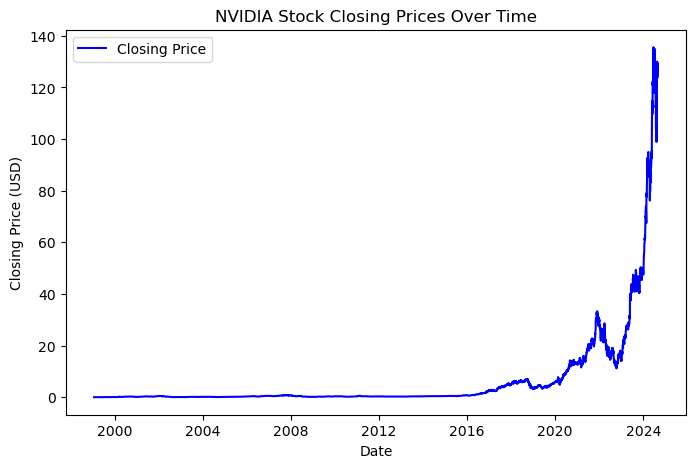

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(nvda_data['Close'], label='Closing Price', color='blue')
plt.title('NVIDIA Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

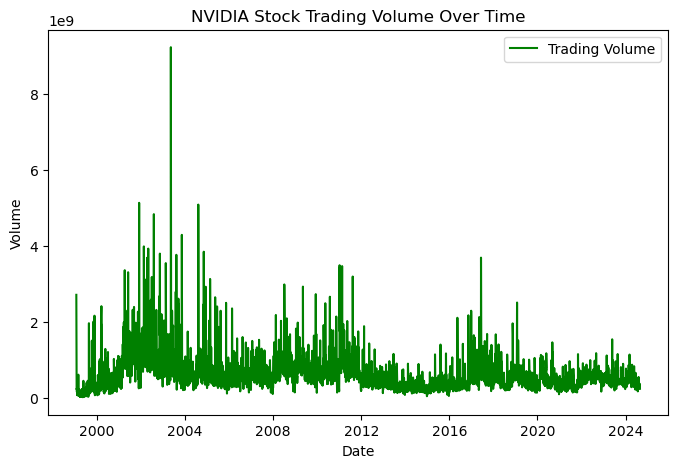

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(nvda_data['Volume'], label='Trading Volume', color='green')
plt.title('NVIDIA Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [5]:
nvda_data['Tomorrow'] = nvda_data['Close'].shift(-1)
nvda_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0,0.041562
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0,0.038337
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0,0.038218
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0,0.038098
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0,0.036307
...,...,...,...,...,...,...,...,...
2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0,129.369995
2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0,126.459999
2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0,128.300003


In [6]:
nvda_data["Target"] = (nvda_data["Tomorrow"] > nvda_data["Close"]).astype(int)
nvda_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0,0.041562,1
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0,0.038337,0
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0,0.038218,0
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0,0.038098,0
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0,0.036307,0
...,...,...,...,...,...,...,...,...,...
2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0,129.369995,1
2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0,126.459999,0
2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0,128.300003,1


In [7]:
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
train = nvda_data.iloc[:-100]
test = nvda_data.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [8]:
preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)

In [9]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

recall = recall_score(test["Target"], preds)
print(f"Recall: {recall}")

accuracy = accuracy_score(test["Target"], preds)
print(f"Accuracy: {accuracy}")

precision = precision_score(test["Target"], preds)
print(f"Precision: {precision}")

Recall: 0.3018867924528302
Accuracy: 0.53
Precision: 0.6153846153846154


<Axes: xlabel='Date'>

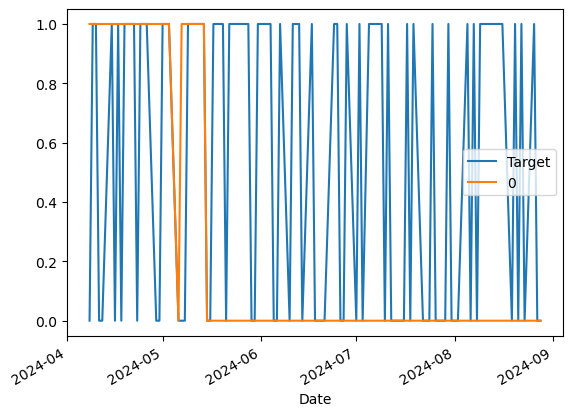

In [10]:
combined = pd.concat([test["Target"], preds], axis = 1)
combined.plot()

In [11]:
def predict_stock_movement(model, data, predictors, today_data):
    input_features = pd.DataFrame([today_data], columns=predictors)
    prediction = model.predict(input_features)[0]
    return prediction


In [12]:
today_data = {
    "Close": 125.0, 
    "Volume": 320000, 
    "Open": 123.5,    
    "High": 126.0,  
    "Low": 122.8     
}

prediction = predict_stock_movement(model, nvda_data, predictors, today_data)
if prediction == 1:
    print("The stock price is predicted to rise tomorrow.")
else:
    print("The stock price is predicted to fall or remain the same tomorrow.")


The stock price is predicted to fall or remain the same tomorrow.


In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [14]:
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i: (i + step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(nvda_data, model, predictors)



In [16]:
predictions["Predictions"].value_counts()

Predictions
0    2280
1    1662
Name: count, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.51985559566787

In [39]:
predictions["Predictions"].value_counts() / predictions.shape[0]

Predictions
0    0.578387
1    0.421613
Name: count, dtype: float64

In [51]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = nvda_data.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    nvda_data[ratio_column] = nvda_data["Close"] / rolling_averages["Close"]
    trend_column = f"Trend_{horizon}"
    nvda_data[trend_column] = nvda_data.shift(1).rolling(horizon).sum()["Target"]
    new_predictors += [ratio_column, trend_column]
    
    

In [55]:
nvda_data = nvda_data.dropna()

In [57]:
nvda_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
2003-01-15 00:00:00-05:00,0.094550,0.095315,0.091569,0.091569,904584000,0.0,0.0,0.085378,0,0.984386,1.0,0.979717,3.0,0.906372,32.0,0.453885,104.0,0.474865,470.0
2003-01-16 00:00:00-05:00,0.090194,0.091340,0.084156,0.085378,2039976000,0.0,0.0,0.082168,0,0.965011,0.0,0.928511,2.0,0.844110,31.0,0.426600,104.0,0.442657,469.0
2003-01-17 00:00:00-05:00,0.083085,0.084232,0.081098,0.082168,1058832000,0.0,0.0,0.080104,0,0.980839,0.0,0.918331,1.0,0.812207,30.0,0.413812,104.0,0.425916,469.0
2003-01-21 00:00:00-05:00,0.083697,0.085455,0.079875,0.080104,967356000,0.0,0.0,0.080181,1,0.987282,0.0,0.923509,1.0,0.792346,29.0,0.406730,103.0,0.415128,469.0
2003-01-22 00:00:00-05:00,0.079875,0.082245,0.079646,0.080181,550992000,0.0,0.0,0.082397,1,1.000481,1.0,0.955902,1.0,0.793079,30.0,0.410637,103.0,0.415437,470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-21 00:00:00-04:00,127.320000,129.350006,126.660004,128.500000,257883600,0.0,0.0,123.739998,0,1.004888,1.0,1.014703,4.0,1.070198,31.0,1.667024,144.0,3.669419,539.0
2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0,129.369995,1,0.981129,1.0,0.975760,3.0,1.029148,30.0,1.598918,143.0,3.522388,538.0
2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0,126.459999,0,1.022243,1.0,1.012507,3.0,1.073806,30.0,1.664494,144.0,3.670575,538.0


In [61]:
model = RandomForestClassifier(n_estimators = 200, min_samples_split = 50, random_state = 1)

In [67]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [69]:
predictions = backtest(nvda_data, model, new_predictors)

In [70]:
predictions["Predictions"].value_counts()

Predictions
0.0    2706
1.0     235
Name: count, dtype: int64

In [73]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5914893617021276